In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df_train['label'] #target
x = df_train.drop(['label'], axis=1).to_numpy() #data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [6]:
df_train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

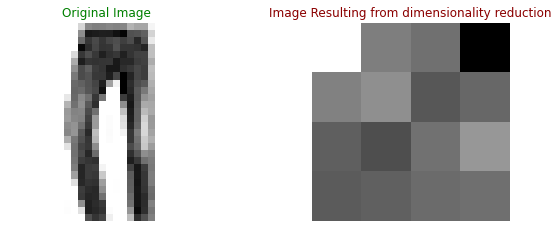

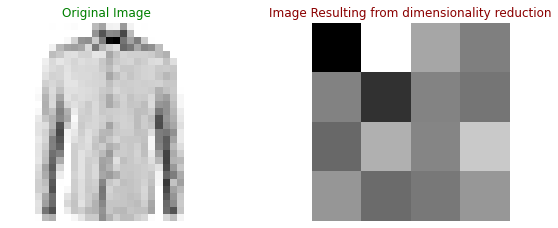

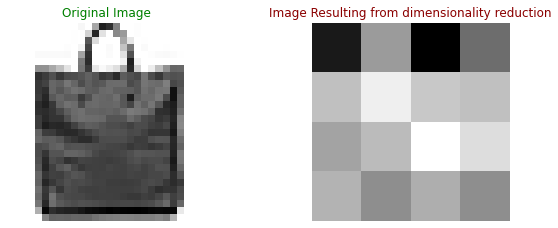

In [50]:
pca = PCA(n_components=16)
X_train_reduced = pca.fit_transform(X_train)

for i in range(3):
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_train_reduced[i].reshape(4,4), cmap="gist_yarg")
    plt.title("Image Resulting from dimensionality reduction", color = "Darkred")
    plt.axis("off")
    plt.show()

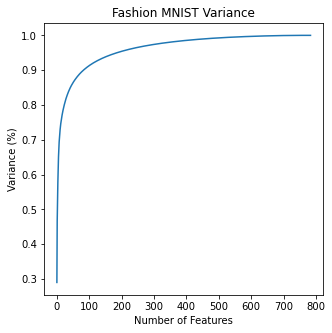

In [8]:
# fit the PCA with the training data
pca = PCA().fit(X_train)

# Plot the cumulative sum of eigenvalues
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Fashion MNIST Variance')
plt.show()

In [113]:
#pipeLine function: scale by StandardScaler, dimensionality reduction by PCA, call a model
def pipeLine(model):
    pipeline = Pipeline([('scaler1', StandardScaler()),
                        ('pca1', PCA(n_components=15)),
                        ('mod', model)])
    return pipeline

In [114]:
#pipeline - fit & score
def pipe(model):
    p = pipeLine(model)
    p.fit(X_train, y_train)
    return round(p.score(X_test, y_test),4)

In [115]:
lr = pipe(LogisticRegression())
lr

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7839

In [116]:
dt = pipe(DecisionTreeClassifier())
dt

0.7626

In [117]:
rf = pipe(RandomForestClassifier())
rf

0.8441

In [118]:
knn = pipe(KNeighborsClassifier(n_neighbors=7))
knn

0.8348

In [112]:
ada = pipe(AdaBoostClassifier(random_state=70, n_estimators=200, learning_rate=0.2, algorithm='SAMME'))
ada

0.5505

In [121]:
pipe(XGBClassifier())

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8481

In [122]:
#voting
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=15)),
    ('clf', VotingClassifier([
        ('rf', RandomForestClassifier()),
        ('knn',KNeighborsClassifier(n_neighbors=7)),
        ('xgb', XGBClassifier()),
        ('lr', LogisticRegression())],voting='soft')), ])

pipeline.fit(X_train, y_train)
round(pipeline.score(X_test, y_test),4)

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8491

In [125]:
#stacking
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=15)),
    ('stack', StackingClassifier([
        ('rf', RandomForestClassifier()),    
        ('knn', KNeighborsClassifier(n_neighbors=7))]))])

pipeline.fit(X_train, y_train)
round(pipeline.score(X_test, y_test),4)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8472

## *conclusions:*

*after dimensionality reduction with PCA, from **784** features to **15** features.*
   * LogisticRegression: 0.7839
   * DecisionTreeClassifier: 0.7626
   * RandomForestClassifier: 0.8441
   
   
   ***ensemble***
   * xgb: 0.8481
   * adaBoost 0.5505
   * voting: 0.8491
   * stacking: 0.8472